# Predict House Prices in King County using Machine Learning models?
# Get the best accuracy possible and deliver the solution

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

The attributes are defined as follows:

1. id: a notation for a house
2. date: Date house was sold
3. price: Price is prediction target
4. bedrooms: Number of Bedrooms/House
5. bathrooms: Number of bathrooms/bedrooms
6. sqft_living: square footage of the home
7. sqft_lots: quare footage of the lot
8. floors: Total floors (levels) in house
9. waterfront: House which has a view to a waterfront
10. view: Has been viewed
11. condition: How good the condition is ( Overall )
12. gradeoverall: grade given to the housing unit, based on King County grading system
13. sqft_above: square footage of house apart from basement
14. sqft_basement: square footage of the basement
15. yr_built: Built Year
16. yr_renovated: Year when house was renovated
17. zipcode: zip
18. lat: Latitude coordinate
19. long: Longitude coordinate
20. sqft_living15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
21. sqft_lot15: lotSize area in 2015(implies-- some renovations)

## Machine Learning Project Template
#### 1. Prepare Problem
###### 1.1. Load libraries
###### 1.2. Load dataset

##### 2. Summarize Data
###### 2.1. Descriptive statistics
###### 2.2. Data visualizations

##### 3. Prepare Data
###### 3.1. Data Cleaning
###### 3.2. Feature Selection
###### 3.3. Data Transforms

##### 4. Evaluate Algorithms
###### 4.1. Split-out validation dataset
###### 4.2. Test options and test metric
###### 4.3. Spot Check Algorithms
###### 4.4. Compare Algorithms

##### 5. Improve Accuracy
###### 5.1. Algorithm Tuning
###### 5.2. Ensembles

##### 6. Finalize Model
###### 6.1. Predictions on validation dataset
###### 6.2. Create standalone model on entire training dataset
###### 6.3. Save model for later use

# Problem Definition

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load libraries
import numpy
import pandas as pd
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

# Analyze Data

In [3]:
data = read_csv('kc_house_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.4+ MB


In [4]:
data.drop("id",axis=1,inplace=True)

In [5]:
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
data.drop("date",axis=1,inplace=True)

Here id an date doesn't contribute much to the preictions. so ropping the two columns

## Descriptive Statistics

In [7]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Visualizations

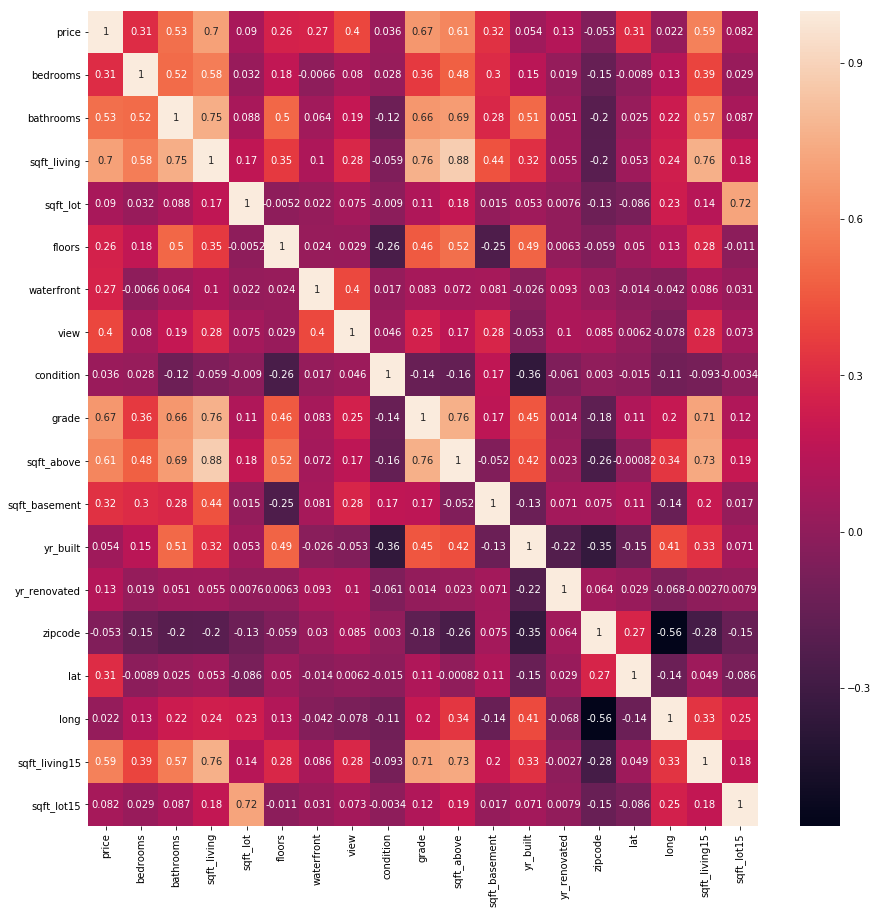

In [8]:
corrmat = data.corr()
pyplot.subplots(figsize = (15,15))
sns.heatmap(corrmat, annot=True)

# Observations

price is strongly correlated with sqft_living,grade,sqft_above,sqft_living15,bathrooms,view. All these attributes
have above 40% correlation with price. 
Which means price increases with increase in sqft_living,grade,sqft_above,view etc.

bedrooms is highly correated with sqft_living, bathrooms,sqft_above compared to other attributes. which means as number of sqft_living increases, number of bedrooms increases.

Bathrooms is comparitively strongly correlated with sqft_living ,sqft_above, grade, sqft_living15 ,price ,bathrooms ,yr_built.

sqft_living is highly correlated with sqft_above,grade, sqft_living15, price, edrooms,bathrooms,sqft_basement

sqft_lot is correated more with sqft_lot15 than compared to any other attributes

floors is comparitively more correlated sqft_above. yr_rennovated,zipcode,lat,long has no much correlation with any of the attributes 

# BOX PLOT AND OUT LIER DETECTION

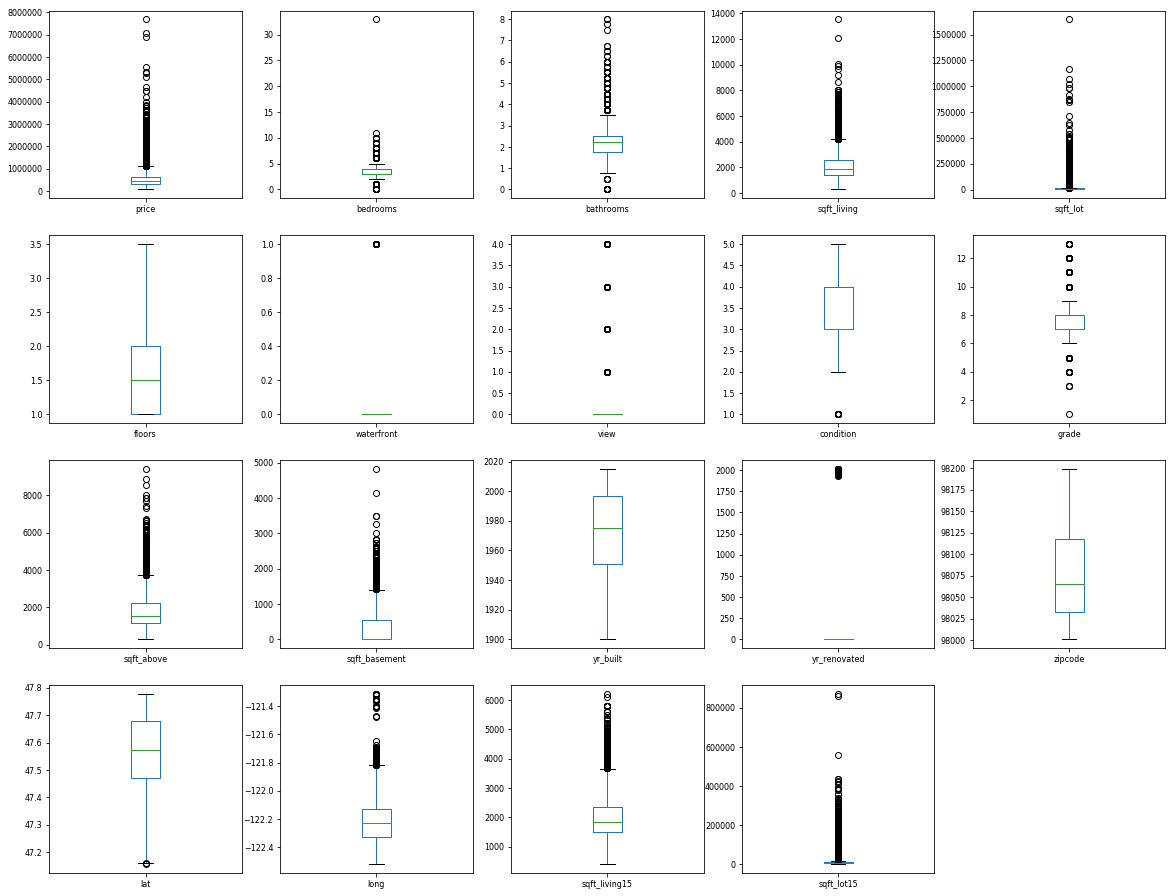

In [9]:
# box and whisker plots
data.plot(kind='box', subplots=True, layout=(5,5), fontsize=8, figsize=(20,20))
pyplot.show()

From the above box plots we can see that there are many outliers in the attributes. So the outliers have to be treated for the better performance

# PAIR PLOT

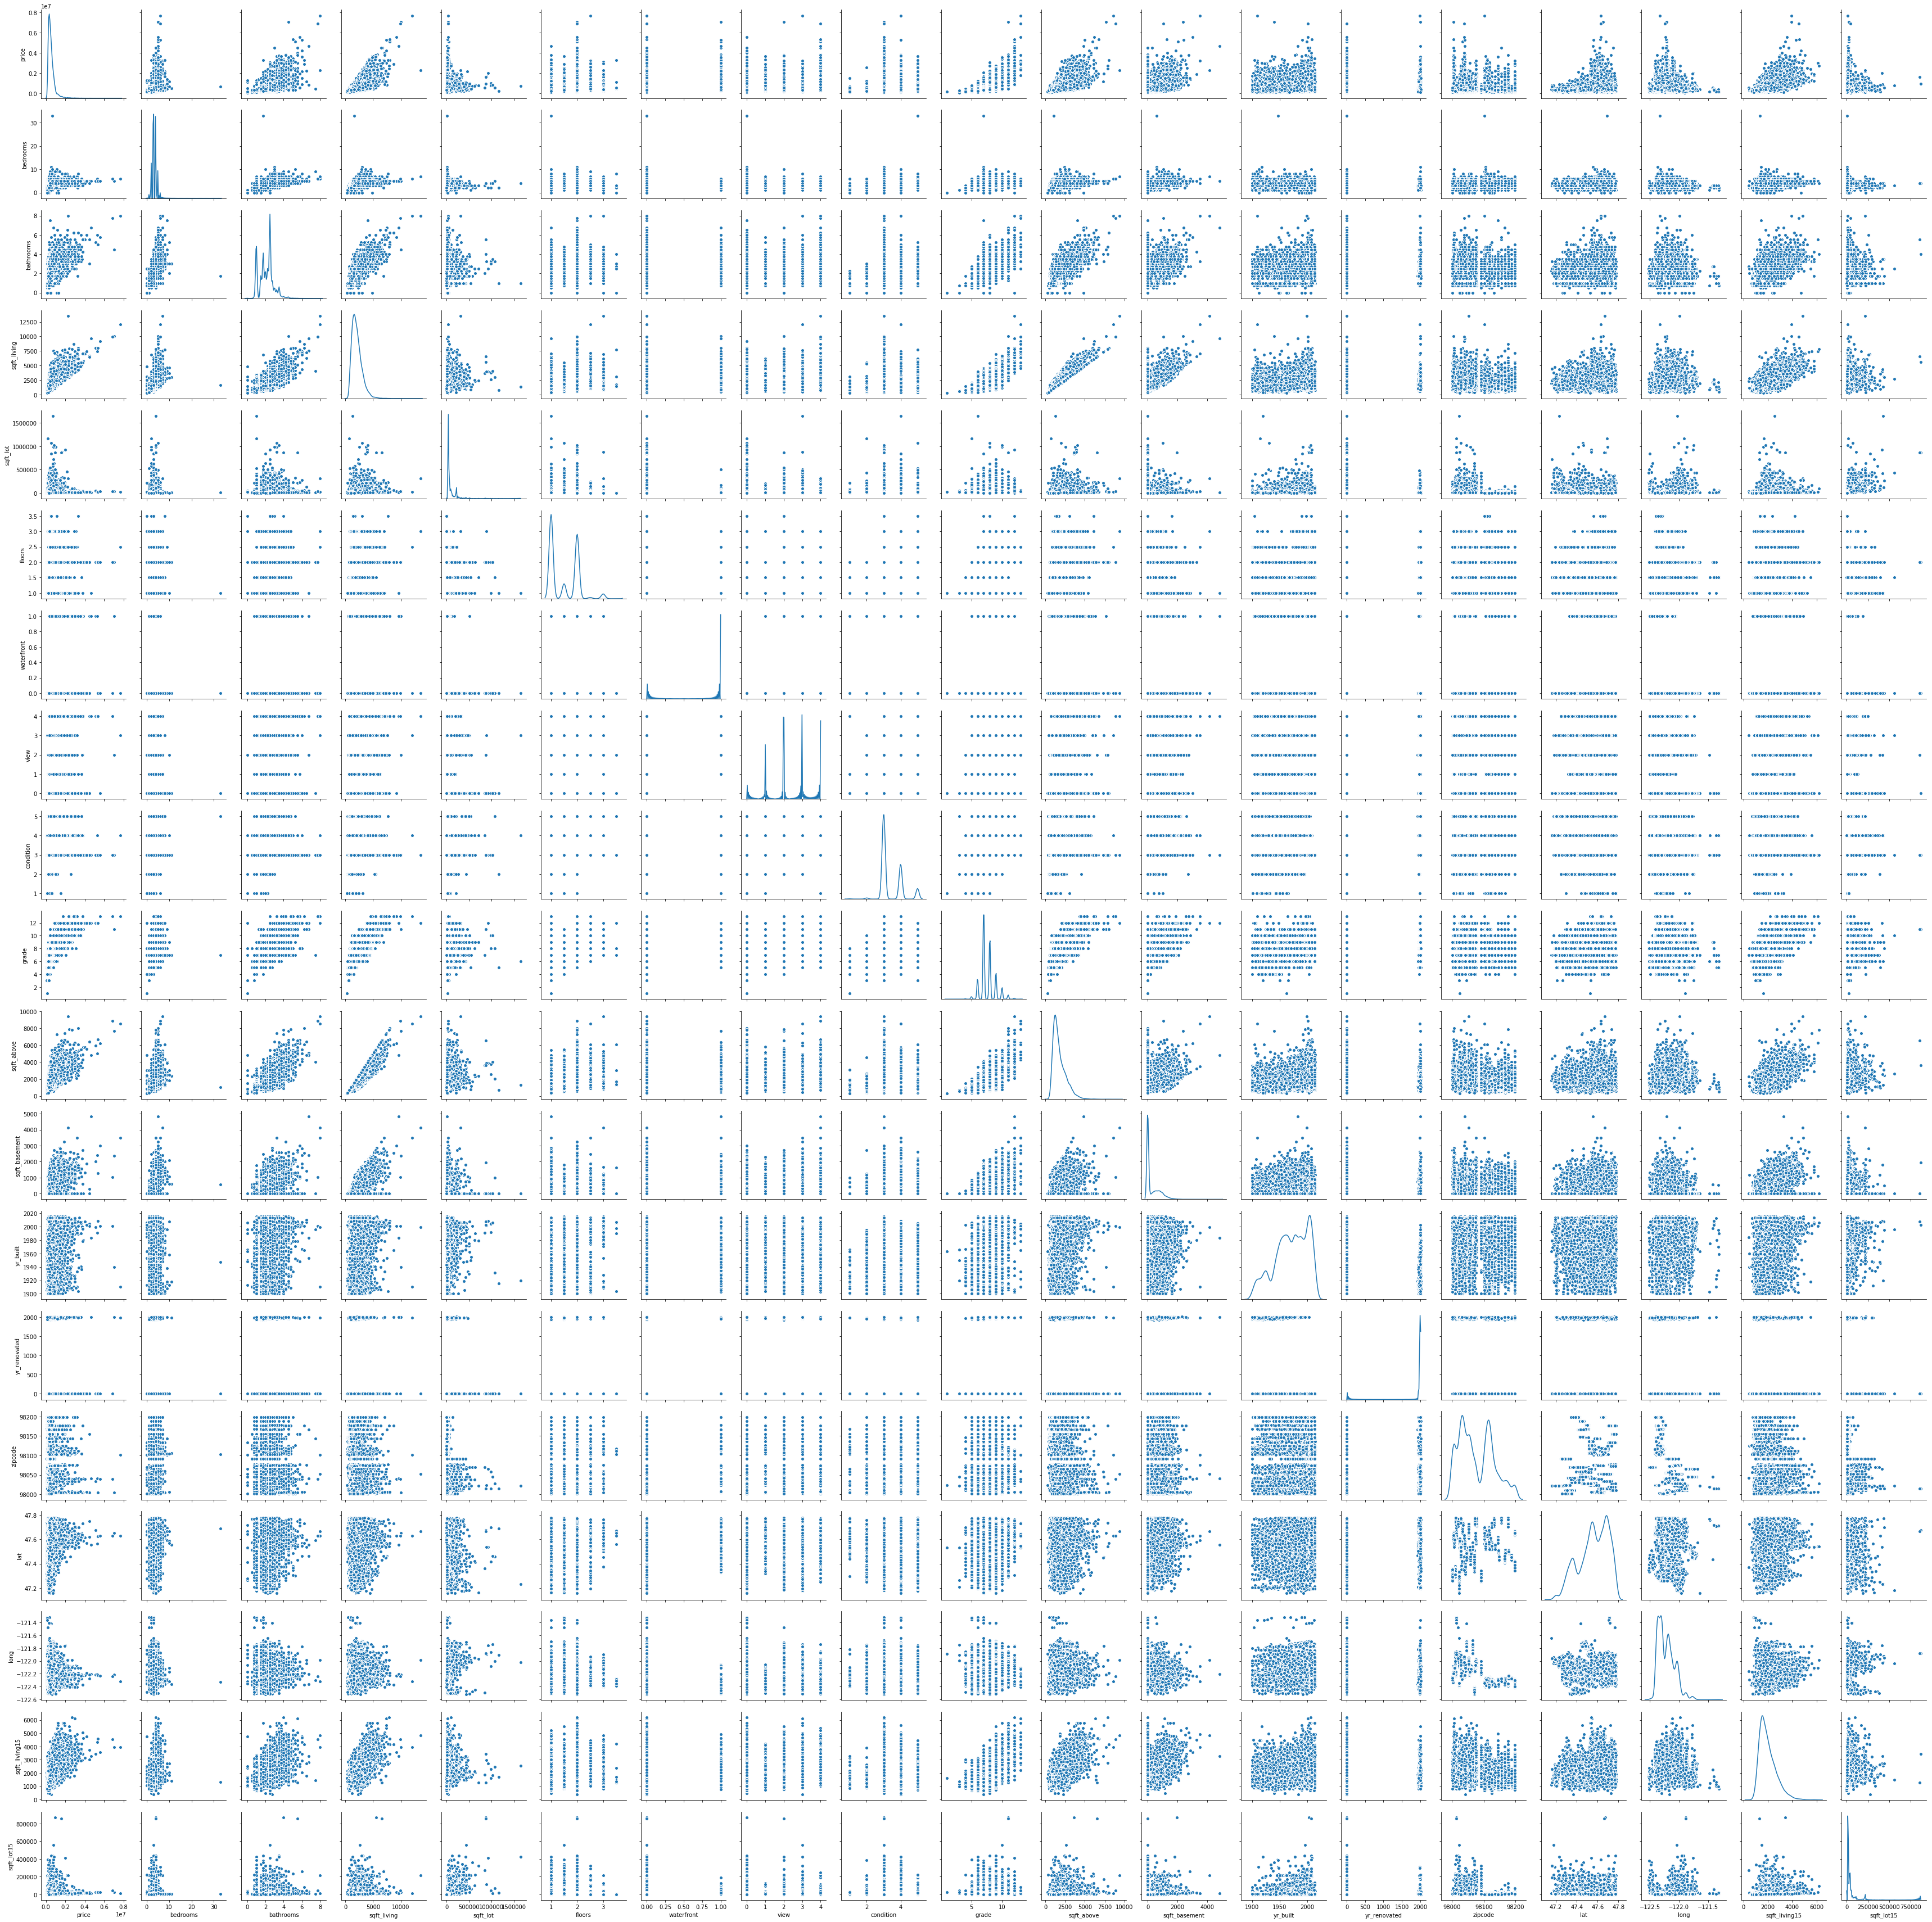

In [10]:
sns.pairplot(data,diag_kind='kde')

From the above plots we can see that the distribution is not normal and are skewed. We can even see the mixture of gaussians in the distributions

# Try to find out important features 

As seen in the above observations, the zipcode might not have significant contribution for the preictions. So dropping the zipcode attribute

In [11]:
data.drop("zipcode",axis=1,inplace=True)

# Test and Train Split

In [12]:
# Split-out validation dataset
X = data.drop('price', axis=1)
Y = data[['price']]
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Build Linear Regression Model with out cross validation

In [13]:
linearRegression =LinearRegression()
linearRegression.fit(X_train,Y_train)
preictions=linearRegression.predict(X_test)

In [14]:
linearRegression.score(X_test,Y_test)

0.6791927832226753

# Build Linear Regression Model with cross validation

In [15]:
# Test options and evaluation metric
num_folds = 10
seed = 7

In [16]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))

In [17]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.696390 (0.015909)
KNN: 0.511034 (0.025360)
CART: 0.723584 (0.051399)


# Observation:

From the above we can see that the linear regression without having kfold validation has lesser accuracy compared to the model with kfold valiation.

Also out of KNN, Linear regression and CART for this data without standardising,CART seems to be performing well.

# Building models after Transorming the data

In [18]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])))

In [19]:
# evaluate each model in turn
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.696445 (0.015787)
ScaledKNN: 0.791531 (0.024723)
ScaledCART: 0.717046 (0.088283)


# Observations:

From the above scores we can see that, after transforming the data KNN seems to be performing well

# Ensemble Methods

In [31]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))

In [32]:
results = []
names = []
for name, model in ensembles: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\Sri Harika\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sri Harika\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sri Harika\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sri Harika\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

ScaledAB: 0.160621 (0.136722)


C:\Users\Sri Harika\Anaconda3\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\Sri Harika\Anaconda3\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\Sri Harika\Anaconda3\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\Sri Harika\Anaconda3\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

ScaledRF: 0.864450 (0.010962)


In [33]:
results = []
names = []
for name, model in ensembles: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X_test, Y_test, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\Sri Harika\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sri Harika\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sri Harika\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sri Harika\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

ScaledAB: 0.422973 (0.101985)


C:\Users\Sri Harika\Anaconda3\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\Sri Harika\Anaconda3\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\Sri Harika\Anaconda3\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\Sri Harika\Anaconda3\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

ScaledRF: 0.802059 (0.030258)


# Observations

Out of all the models, Random forest with standardised data and done with 10 fold cross validation is performing well with accuracy of 86% train and 80% test accuracy